# Descripción y preparación del dataset

> a) Construya un dataframe con los datos a analizar descargando los datos desde la URL. Determine
cuántos registros contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas. Determine
además el número promedio de palabras por ítem en cada clase.

El conjunto de datos corresponde a una colección de sonidos fonéticos que deben identificarse con vocales del inglés británico. Se construyó un dataframe con los datos a utilizar. Los datos han sido representados en un espacio de *d = 10* características. El conjunto de entrenamiento tiene 528 ejemplos, mientras que el conjunto de prueba tiene 462 ejemplos.

In [1]:
import urllib
import pandas as pd
train_df = pd.DataFrame.from_csv('vowel.train',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('vowel.test',header=0,index_col=0)

Mientras que los valores de los atributos toman valores reales, la salida es un entero indicando a que clase corresponde. En total hay 11 clases distintas.

In [2]:
train_df.describe()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,6.000000,-3.166695,1.735343,-0.448002,0.524983,-0.389280,0.584960,0.017477,0.417394,-0.268112,-0.084568
std,3.165277,0.957965,1.160970,0.741363,0.769361,0.722011,0.648547,0.479254,0.595580,0.619584,0.560317
min,1.000000,-5.211000,-1.274000,-2.487000,-1.409000,-2.127000,-0.836000,-1.537000,-1.293000,-1.613000,-1.680000
25%,3.000000,-3.923000,0.916750,-0.945500,-0.083500,-0.930750,0.108500,-0.297000,-0.018250,-0.673750,-0.507000
50%,6.000000,-3.097000,1.733000,-0.502500,0.456500,-0.417000,0.527500,0.040000,0.477000,-0.255000,-0.082500
75%,9.000000,-2.511750,2.403750,0.049250,1.164000,0.115500,1.009750,0.348000,0.861250,0.137500,0.301000
max,11.000000,-0.941000,5.074000,1.413000,2.191000,1.831000,2.327000,1.403000,1.673000,1.309000,1.396000


In [3]:
test_df.describe()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,6.000000,-3.246078,2.049102,-0.576076,0.504626,-0.210089,0.681998,-0.029327,0.244162,-0.342820,-0.056221
std,3.165706,0.753377,1.170402,0.671069,0.748236,0.578353,0.544476,0.440483,0.532523,0.505557,0.650602
min,1.000000,-4.982000,-1.074000,-2.091000,-1.044000,-1.733000,-0.405000,-1.282000,-0.949000,-1.409000,-1.241000
25%,3.000000,-3.855750,1.194000,-1.037000,-0.049250,-0.612000,0.278250,-0.310250,-0.167750,-0.721750,-0.564500
50%,6.000000,-3.220000,2.101500,-0.621000,0.418500,-0.181500,0.593000,0.005500,0.245000,-0.358000,-0.257500
75%,9.000000,-2.706500,2.985000,-0.181000,0.960750,0.199000,1.038500,0.245750,0.651500,0.019500,0.594750
max,11.000000,-1.093000,4.314000,1.431000,2.377000,1.114000,2.108000,1.209000,2.039000,0.757000,1.294000


> b) Construya matrices X e y que contengan las características y las etiquetas correspondientes a los datos
de entrenamiento y pruebas. Normalice apropiadamente los datos antes de empezar a trabajar.

Es necesario escalar y normalizar los datos antes de cualquier operación. Esto es para evitar que un atributo con valores en una escala muy distinta al resto tenga mayor influencia.

In [4]:
from sklearn.preprocessing import StandardScaler
X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values
X_std = StandardScaler().fit_transform(X)

Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values
X_std_test = StandardScaler().fit_transform(Xtest)

# Reducción de dimensionalidad

En esta sección se comparan técnicas de reducción de dimensionalidad. Estas técnicas a lo que apuntan es a reducir el número de dimensiones con las que se esta trabajando. El objetivo de estos es reducir el número de dimensiones de forma de disminuir el volumen de los datos reduciendo el costo de almacenamiento y cálculo sobre estos, y además mitigando los efectos de la maldición de la dimensionalidad.

## PCA - Principal Component Analysis

> c) Utilizando PCA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando cada clase con un color distinto (elija una paleta apropiada).

Se generó una representación en dos dimensiones utilizando PCA. PCA es un método de reducción de dimensionalidad consistente en una transformación ortogonal lineal de forma que la varianza sea la más grande sobre la proyección de la componente principal.

Luego de generar la representación de PCA se obtuvo una *scatter plot* de los datos y sus clases. Se puede observar que las clases quedan bastante entremezcladas y no pareciera haber una diferencia clara entre ellas en el gráfico. Cada clase no pareciera tener un centro o área predefinida que las diferencie del resto.

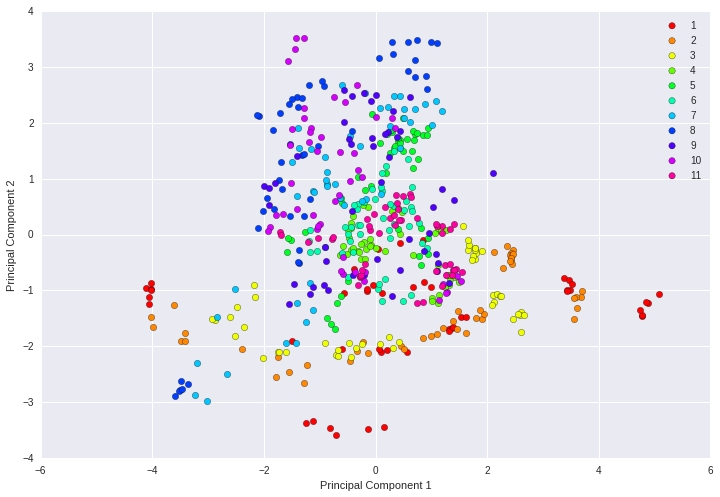

In [5]:
%matplotlib inline

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('hsv')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
#mclasses=(4,6)
mcolors = [cmap(i) for i in np.linspace(0,1,12)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
	plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],s=40,label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

## LDA - Linear Discriminant Analysis

> d) Utilizando LDA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando cada clase con un color distinto (elija una paleta apropiada).

También se generó una representación de dos dimensiones utilizando LDA. LDA encuentra una combinación lineal de características que busca caracterizar o separar las clases de los datos. Se puede ver que LDA toma en cuenta la clase en el momento que se aplica (`Xred_lda = sklearn_lda.fit_transform(X_std,y)`) a diferencia de PDA que solo trabaja con los atributos.

Al obtener la *scatter plot* se puede ver que las clases aún se encuentran entremezcladas, pero no tanto como ocurría en la representación de PCA. De hecho mientras que en PCA no es posible discernir algún par de clases que no se encuentren entremezcladas. En la representación de LDA si es posible. Por ejemplo, las clase 1 y 8 están claramente separadas en la representación generada usando LDA.

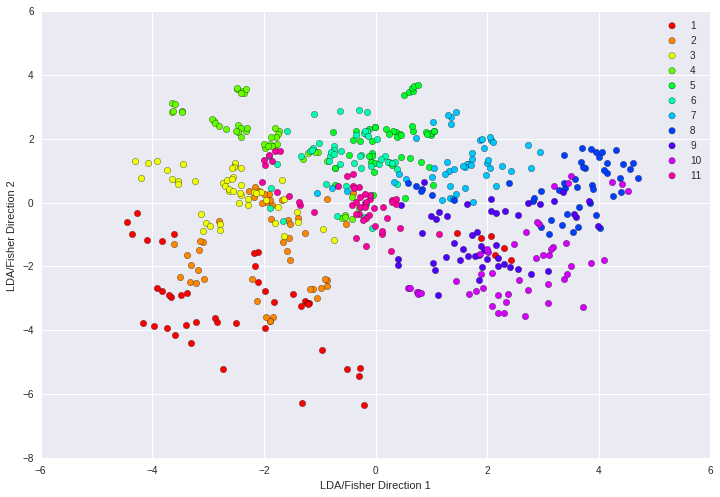

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('hsv')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
#mclasses=(4,6)
mcolors = [cmap(i) for i in np.linspace(0,1,12)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
	plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],s=40,label=lab,c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)

plt.show()

> e) Compare cualitativamente los resultados obtenidos en 1 y 2. Proponga un método para elegir una técnica de reducción de dimensionalidad.

Una forma en que se podría determinar que técnica de reducción de dimensionalidad usar podría ser usando las varianzas intra-class y inter-class. Una buena representación de los datos debería hacer que cada clase este separada lo más posible de las otras (maximizar la varianza inter-class) mientras que los datos en cada clase se parezcan lo más entre sí (minimizar la varianza intra-class).

En este caso se da que LDA es justamente la que tiene la menor varianza intra-class y la mayor varianza inter-class puesto que LDA aplica el mismo principio, minimiza la varianza intra-class y maximiza la inter-class.

In [7]:
def intraclass_var(X,y):
	varintra = 0
	for i in range(1,12):
		class_x = np.array([X[j] for j in range(0,len(y)) if y[j] == i])
		class_mean = [np.mean(class_x[:,0]),np.mean(class_x[:,1])]
		varintrai = 0
		#print i
		#print class_x 
		#print class_mean
	
		for x in [X[j] for j in range(0,len(y)) if y[j] == i]:
			varintrai += (x - class_mean)**2 
		#print "np var:%s"%str([np.var(class_x[:,0]),np.var(class_x[:,1])])
		varintra += varintrai/len(class_x)
		varintra/11
	return varintra

def interclass_var(X,y):
	total_mean = np.array([np.mean(X[:,0]),np.mean(Xred_pca[:,1])])
	interclass = 0
	for i in range(1,12):
		class_x = np.array([X[j] for j in range(0,len(y)) if y[j] == i])
		class_mean = np.array([np.mean(class_x[:,0]),np.mean(class_x[:,1])])
		interclass += (class_mean - total_mean)**2
	return interclass


Xstd_pca = StandardScaler().fit_transform(Xred_pca)
Xstd_lda = StandardScaler().fit_transform(Xred_lda)

print "PCA intra-class variance: %s"%str(intraclass_var(Xstd_pca,y))
print "PCA inter-class variance: %s"%str(interclass_var(Xstd_pca,y))

print "LDA intra-class variance: %s"%str(intraclass_var(Xstd_lda,y))
print "LDA inter-class variance: %s"%str(interclass_var(Xstd_lda,y))

PCA intra-class variance: [ 9.36206786  6.25448127]
PCA inter-class variance: [ 1.63793214  4.74551873]
LDA intra-class variance: [ 2.17735808  3.10891781]
LDA inter-class variance: [ 8.82264192  7.89108219]


Otra forma, inspirada en la visualización de los datos, sería calcular el convex-hull para cada clase. Para un conjunto de vertices el convex-hull consiste en el polígono convexo de menor área que cubra todo los vértices. Posterior a ello calcular la suma del área de las intersecciones de estos polígonos entre cada par de clases. El problema es que la implementación de convex-hull es algo engorrosa y algo costosa computacionalmente con peor caso $O(n^2)$.

Una versión más simple sería usar el rectángulo que cubre todos los puntos usando las coordenadas mínimas y máximas de cada clase y luego calcular la intersección.

Por último ambos enfoques pueden ser bien sensibles al ruido o datos mal clasficados. Un dato posicionado en un área cercana a otras clases provocará un área de intersección enorme.

# Entrenamiento de clasificadores

> f) Construya un clasificador que determine la clase de un dato x aleatoriamente sin considerar las características sino que solamente la probabilidad a-priori de cada clase. Por ejemplo, si la clase y = 0 ocurre el 25% de las veces, su clasificador debe predecir esta clase para un determinado x con probabilidad 0.25, independiente de los atributos de x.

Se entrenaron clasificadores utilizando tres modelos: 
 - LDA (Linear Discriminant Analysis)
 - QDA (Quadratic Discriminant Analysis)
 - kNN (k-Nearest Neighbors)

El entrenamiento se realizó sin aplicar ninguna técnica de reducción de dimensionalidad.

Para comparaciones de rendimiento se hizo uso de un clasificador que determinaba aleatoriamente la clase en base a la estratificación de los datos independiente de los atributos que contuviera. Es decir, el porcentaje de ejemplos en el conjunto de entrenamiento que pertenecen a cierta clase es igual o proporcional a la probabilidad de que el clasificador señale que el dato pertenece a esa clase.

La medida de comparación es el *accuracy* que mide el cuociente de ejemplos correctamente clasificados respecto del total.

In [1]:
# Conclusiones

Se llevó a cabo predicción de competencias para un dataset basado en datos extraídos desde la red social LinkedIn. Se observó que la gran mayoría de las competencias eran declaradas por pocos usuarios. Se entrenaron 5 clasificadores (Bayesiano Ingenuo, Regresión Logística, SVM Lineal, SVM con kernel Gaussiano y k-Nearest Neighbors) para 5 competencias con distinta rareza.

Se observó que los mejores clasificadores, en los casos de competencias comunes, venían a ser SVM lineal y Regresión Logística, pero la mayoría (a excepción de k-Nearest Neighbors) lograron un desempeño decente sobre el conjunto de pruebas.

En los casos de competencias raras los clasificadores tenían un mal comportamiento. Tanto Bayesiano Ingenuo como k-Nearest Neighbors tenían problemas debido al desbalance de las clases y predecían todos los ejemplos como de una clase. Los otros clasificadores también vieron una baja considerable en su desempeño. En estos casos el clasificador SVM Gaussiano resultó el mejor para la medida *recall*.

Pareciera ser que estos clasificadores tienen problemas al tener un dataset con un desbalance tan grande entre clases y podría deberse a una dificultad de encontrar relaciones de estas competencias raras con otras (sean raras o comunes).from sklearn.dummy import DummyClassifier
dum_model = DummyClassifier(strategy='stratified',random_state=1937)
dum_model.fit(X_std,y);

SyntaxError: invalid syntax (<ipython-input-1-a9a6b9d29f7d>, line 3)

Se puede ver que los tres modelos superan al clasificador aleatorio por un amplío margen, tanto en el conjunto de entrenamiento como el de pruebas, por lo que podría decirse que están funcionando y clasificando relativamente bien.

No obstante, los tres clasificadores tienen un desempeño algo mediocre puesto que menos de la mitad de los datos del conjunto de pruebas son clasificados correctamente. Entre los tres, el que obtuvo el mejor desempeño sobre el conjunto de pruebas fue k-NN, seguido por LDA y luego por QDA.

Comparando QDA y LDA se puede ver un cierto sobre-ajuste por parte de QDA. Aún cuando LDA tiene un peor desempeño en el conjunto de entrenamiento y es un modelo más simple que QDA (lineal vs cuadrático) logra un mejor desempeño en el conjunto de pruebas. QDA en cambio logra clasificar correctamente casi todos los datos del conjunto de entrenamiento, pero aún así tiene un peor desempeño que LDA en el conjunto de pruebas.

k-NN por su parte logra un muy buen desempeño en el conjunto de entrenamiento y de los tres clasificadores es el mejor en el conjunto de pruebas.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier

lda_model = LDA()
lda_model.fit(X_std,y)
print "LDA Training\t%f"%lda_model.score(X_std,y)
print "LDA Testing\t%f"%lda_model.score(X_std_test,ytest)
qda_model = QDA()
qda_model.fit(X_std,y)
print "QDA Training\t%f"%qda_model.score(X_std,y)
print "QDA Testing\t%f"%qda_model.score(X_std_test,ytest)
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_std,y)
print "knn Training\t%f"%knn_model.score(X_std,y)
print "knn Testing\t%f"%knn_model.score(X_std_test,ytest)

print "DUMS Training\t%f"%dum_model.score(X_std,y)
print "DUMS Testing\t%f"%dum_model.score(X_std_test,ytest)

LDA Training	0.683712
LDA Testing	0.452381
QDA Training	0.988636
QDA Testing	0.415584
knn Training	0.931818
knn Testing	0.491342
DUMS Training	0.106061
DUMS Testing	0.101732


Se debe notar que el clasificador k-Nearest Neighbors depende del parámetro k. El parámetro k controla el número de vecinos más cercanos con los que se compara cada punto para determinar su clase. Por lo que un parámetro k muy grande va a incluir vecinos de otras clases y provocará errores de clasificación, un parámetro k muy pequeño podría hacer que no se incluyan suficientes vecinos de clase correcta y provocará errores de clasificación.

Se generó un gráfico que relaciona el parámetro k con el error de mis-clasificación para valores de $k = 5,...,20$. Se puede observar en el gráfico que a medida que aumenta k el error de clasificación en el conjunto de entrenamiento va aumentando, pero en el conjunto de pruebas solo varia. 

El error mínimo en el conjunto de pruebas es conseguido con $k = 8$ vecinos por lo que se usará este valor en lo que sigue de este trabajo. 

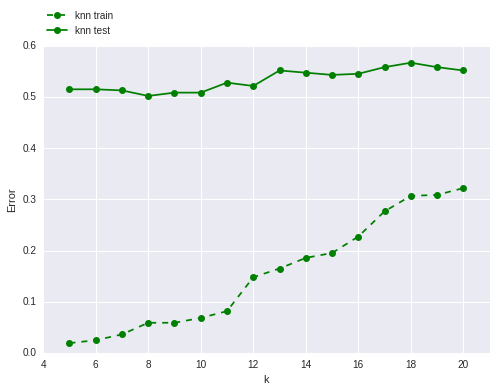

In [44]:
knn_train_error = []
knn_test_error = []

for k in range(5,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_std,y)
    knn_train_error.append(1-knn_model.score(X_std,y))
    knn_test_error.append(1-knn_model.score(X_std_test,ytest))
        
plt.plot(range(5,21), knn_train_error, 'go--', label='knn train')
plt.plot(range(5,21), knn_test_error, 'go-', label= 'knn test')
plt.xlim(4,21)

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)

plt.xlabel('k')
plt.ylabel('Error')
plt.show()

# Efecto de reducción de dimensionalidad

Es natural pensar que al reducir el número de dimensiones, con cualquier técnica, debe haber una cierta cantidad de perdida de información que podría ser usada por los clasificadores. También se podría pensar que al reducir las dimensiones los datos quedan distribuidos de mejor forma para algún clasificador. En esta sección se analizan los efectos de las técnicas de reducción de dimensionalidad vista anteriormente.

## Efecto de PCA

> g) Utilice PCA para generar una representación de la data en d = 1, 2, 3, . . . , 10 dimensiones. Para cada
caso entrene un modelo LDA, QDA y de k-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus d. Sobreponga a este gráfico el error de pruebas versus d. Concluya.

Se generó una representación usando PCA reduciendo el número de dimensiones a $n = 1,2,...,10$ dimensiones y se entrenó cada clasificador para cada representación. Se generó un gráfico del error de misclasificación vs el número de dimensiones para cada clasificador en cada conjunto (de entrenamiento y de pruebas).

El gráfico muestra que pareciera haber una tendencia descendente del error respecto del número de dimensiones con algunas cimas hacia el final.

Todos los clasificadores tienen un error muy alto cuando se reduce el problema a una sola dimensión.

LDA pareciera disminuir el error en el conjunto de entrenamiento conformé aumenta el número de dimensiones mientras que en el conjunto de pruebas tiende a estabilizarse una vez alcanzadas las 7 dimensiones.

QDA por otra parte también disminuye enormemente su error hasta llegar a las 10 dimensiones en el conjunto de entrenamiento, sin embargo, en el conjunto de pruebas obtiene su error mínimo cuando se hace uso de 6 dimensiones y luego éste asciende. De hecho, a partir de las 8 dimensiones presenta un desempeño inferior a LDA. Así que QDA presenta sobre-ajuste a medida que tiene mayor información.

kNN por último obtuvo el mejor error de los tres clasificadores en el conjunto de pruebas a excepción del caso de dos dimensiones donde QDA tuvo un rendimiento superior. El error de kNN en ambos conjuntos no pareciera presentar gran variación luego de las 5 y 6 dimensiones.

Por último notar que en 10 dimensiones el error obtenido es el mismo que cuando se entrenan los clasificadores sin aplicar ninguna técnica. PCA entrega el mismo espacio de 10 dimensiones.

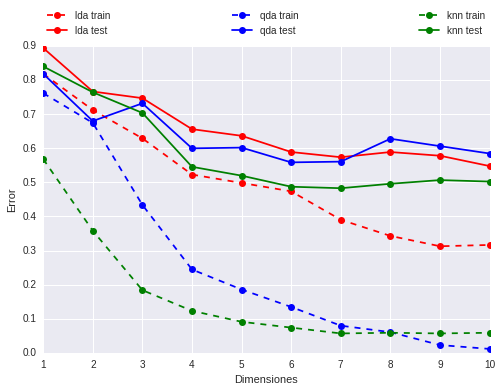

In [46]:
lda_train_score = []
lda_test_score = []
qda_train_score = []
qda_test_score = []
knn_train_score = []
knn_test_score = []

for dimensions in range(1,11):
    sklearn_pca = PCA(n_components=dimensions)
    Xred_pca = sklearn_pca.fit_transform(X_std)
    Xtest_pca = sklearn_pca.transform(X_std_test)
    
    lda_model.fit(Xred_pca,y)
    qda_model.fit(Xred_pca,y)
    knn_model = KNeighborsClassifier(n_neighbors=8)
    knn_model.fit(Xred_pca,y)
    
    lda_train_score.append(1.0-lda_model.score(Xred_pca,y))
    lda_test_score.append(1.0-lda_model.score(Xtest_pca,ytest))
    qda_train_score.append(1.0-qda_model.score(Xred_pca,y))
    qda_test_score.append(1.0-qda_model.score(Xtest_pca,ytest))
    knn_train_score.append(1.0-knn_model.score(Xred_pca,y))
    knn_test_score.append(1.0-knn_model.score(Xtest_pca,ytest))
    
    
    #print "Dimensions:%d"%dimensions
    #print "LDA Training\t%f"%lda_model.score(Xred_pca,y)
    #print "LDA Testing\t%f"%lda_model.score(Xtest_pca,ytest)
    
    #print "QDA Training\t%f"%qda_model.score(Xred_pca,y)
    #print "QDA Testing\t%f"%qda_model.score(Xtest_pca,ytest)
    
    #print "knn Training\t%f"%knn_model.score(Xred_pca,y)
    #print "knn Testing\t%f"%knn_model.score(Xtest_pca,ytest)
    

plt.plot(range(1,11), lda_train_score, 'ro--', label='lda train')
plt.plot(range(1,11), lda_test_score, 'ro-', label= 'lda test')
plt.plot(range(1,11), qda_train_score, 'bo--', label='qda train')
plt.plot(range(1,11), qda_test_score, 'bo-', label= 'qda test')
plt.plot(range(1,11), knn_train_score, 'go--', label='knn train')
plt.plot(range(1,11), knn_test_score, 'go-', label= 'knn test')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)

plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.show()

## Efecto de LDA

> h) Utilice LDA para generar una representación de la data en d = 1, 2, 3, . . . , 10 dimensiones. Para cada
caso entrene un modelo LDA, QDA y de k-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus d. Sobreponga a este gráfico el error de pruebas versus d. Concluya.

Con LDA se aprecia una fuerte diferencia respecto del uso de PCA.

Aunque al comienzo es similar, todos los clasificadores tienen un mal comportamiento cuando el problema es reducido a una sola dimensión se puede ver que el error de los clasificadores tiende a disminuir en el conjunto de entrenamiento a medida que se incluyen más dimensiones. Sin embargo el comportamiento es distinto en el conjunto de pruebas.

No se percibe mucha diferencia en el error para el clasificador LDA tanto en el conjunto de entrenamiento como en el de pruebas para más de dos dimensiones. En el de pruebas disminuye ligeramente. El que esta diferencia sea tan leve podría deberse a la redundancia de usar LDA para clasificar sobre una representación generada también por LDA.

El clasificador QDA presenta un comportamiento peculiar. En el conjunto de entrenamiento disminuye considerablemente el error a medida que aumentan las dimensiones, mientras que en el conjunto de pruebas aumenta alcanzando el punto máximo en 7 dimensiones. Esto podría ser debido a que un modelo cuadrático podría estar generando sobre-ajuste tratándose de un espacio modelado linealmente.

Por último el clasificador kNN es el que mejor se comporta, mejorando levemente su desempeño y obteniendo errores más bajos que al usar la representación por PCA. Su error mínimo se logra con $n = 9$ dimensiones, pero consigue mejores puntajes incluso al usar 10 dimensiones. 

Esto indica que la representación de 10 dimensiones al aplicar LDA es distinta a los datos originales. Esto pues igual se aplica el principio de LDA de minimizar la varianza intra-class y maximizar la varianza inter-class haciendo que los datos se muevan en el espacio respecto a sus clases.

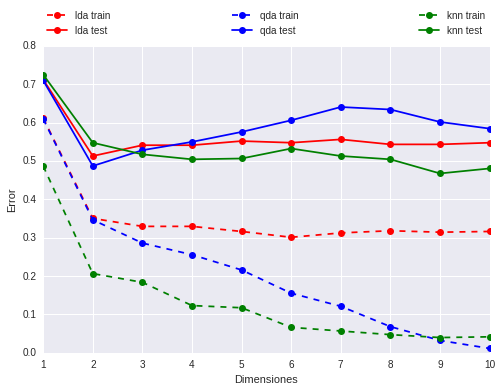

In [45]:
lda_train_score = []
lda_test_score = []
qda_train_score = []
qda_test_score = []
knn_train_score = []
knn_test_score = []

for dimensions in range(1,11):
    sklearn_pca = LDA(n_components=dimensions)
    Xred_lda = sklearn_pca.fit_transform(X_std,y)
    Xtest_lda = sklearn_pca.transform(X_std_test)
    
    lda_model.fit(Xred_lda,y)
    qda_model.fit(Xred_lda,y)
    knn_model = KNeighborsClassifier(n_neighbors=8)
    knn_model.fit(Xred_lda,y)
    
    lda_train_score.append(1-lda_model.score(Xred_lda,y))
    lda_test_score.append(1-lda_model.score(Xtest_lda,ytest))
    qda_train_score.append(1-qda_model.score(Xred_lda,y))
    qda_test_score.append(1-qda_model.score(Xtest_lda,ytest))
    knn_train_score.append(1-knn_model.score(Xred_lda,y))
    knn_test_score.append(1-knn_model.score(Xtest_lda,ytest))
    
    
    #print "Dimensions:%d"%dimensions
    #print "LDA Training\t%f"%lda_model.score(Xred_lda,y)
    #print "LDA Testing\t%f"%lda_model.score(Xtest_lda,ytest)
    
    #print "QDA Training\t%f"%qda_model.score(Xred_lda,y)
    #print "QDA Testing\t%f"%qda_model.score(Xtest_lda,ytest)
    
    #print "knn Training\t%f"%knn_model.score(Xred_lda,y)
    #print "knn Testing\t%f"%knn_model.score(Xtest_lda,ytest)
    

plt.plot(range(1,11), lda_train_score, 'ro--', label='lda train')
plt.plot(range(1,11), lda_test_score, 'ro-', label= 'lda test')
plt.plot(range(1,11), qda_train_score, 'bo--', label='qda train')
plt.plot(range(1,11), qda_test_score, 'bo-', label= 'qda test')
plt.plot(range(1,11), knn_train_score, 'go--', label='knn train')
plt.plot(range(1,11), knn_test_score, 'go-', label= 'knn test')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)

plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.show()

# Conclusiones

Se entrenaron distintos clasificadores y se aplicaron dos técnicas de reducción de dimensionalidad.

De los clasificadores, k-Nearest Neighbors fue el mejor clasificador consiguiendo un mejor desempeño para el conjunto de pruebas. QDA presentó sobre-ajuste sobretodo cuando se contaban con más dimensiones.

De las técnicas de reducción de dimensionalidad, LDA mostró un mejor comportamiento con los clasificadores. Curiosamente QDA y LDA lograron un mejor rendimiento al usarse solo 2 dimensiones reduciendo su desempeño a medida que aumentaba el número de dimensiones. kNN logró el mejor desempeño para este problema en el caso de 9 dimensiones y pareciera ser el que más se beneficiaba por la representación LDA.

PCA no mostró un tan buen desempeño, pero se debe notar que es una técnica más genérica que no requiere el etiquetado de los ejemplos por lo que puede usarse en casos no supervisados. 

Concluyendo, si se quiere trabajar sobre un problema lo más reducido posible conviene reducir dimensionalidad utilizando LDA y aplicar QDA. Si se puede trabajar con el mismo volumen de datos se puede cambiar la representación utilizando LDA y luego aplicando k-Nearest Neighbors.